Importing libraries and Reading data

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [242]:
df=pd.read_csv("student_habits_performance.csv")
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [243]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [244]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


#### We will remove ID that is not provide inforamtion to model

In [245]:
df.drop("student_id",axis=1,inplace=True)

### Check The duplicates and non values

In [246]:
print(f"The shape before Removing duplicates is: {df.shape}")
print(f"Number of duplicates is {df.duplicated().sum()}")
df.drop_duplicates()
print(f"The shape after Removing duplicates is: {df.shape}")



The shape before Removing duplicates is: (1000, 15)
Number of duplicates is 0
The shape after Removing duplicates is: (1000, 15)


In [247]:
print("Number of Non values for each column is: ")
df.isna().sum().sort_values(ascending=False)

Number of Non values for each column is: 


parental_education_level         91
age                               0
gender                            0
study_hours_per_day               0
social_media_hours                0
netflix_hours                     0
part_time_job                     0
attendance_percentage             0
sleep_hours                       0
diet_quality                      0
exercise_frequency                0
internet_quality                  0
mental_health_rating              0
extracurricular_participation     0
exam_score                        0
dtype: int64

In [248]:
#We have Object column parental_education_level has non values 
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
df[["parental_education_level"]]=imputer.fit_transform(df[["parental_education_level"]])

# Visualization of categorical columns

### Number of each class of the column

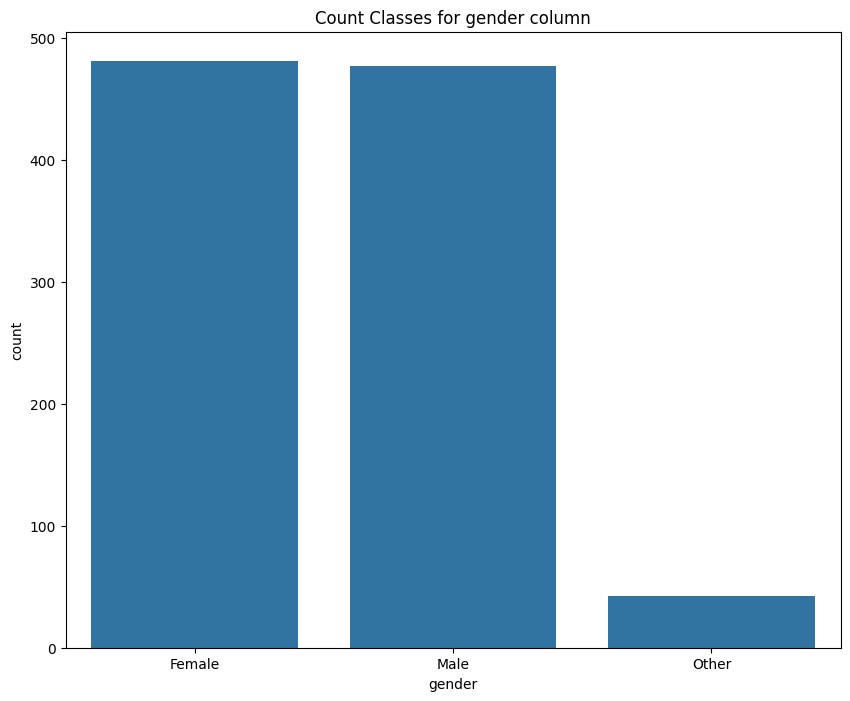

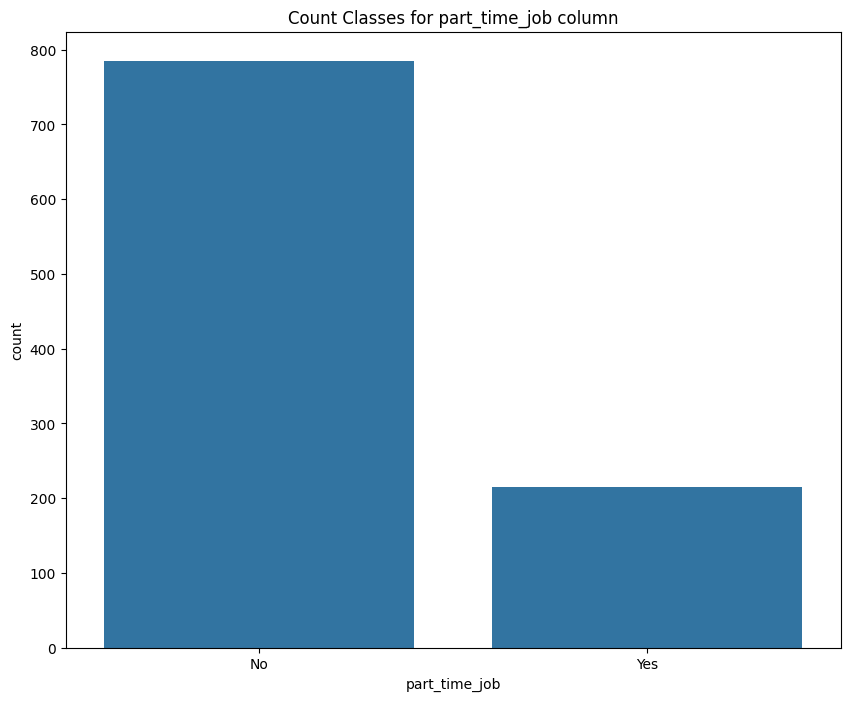

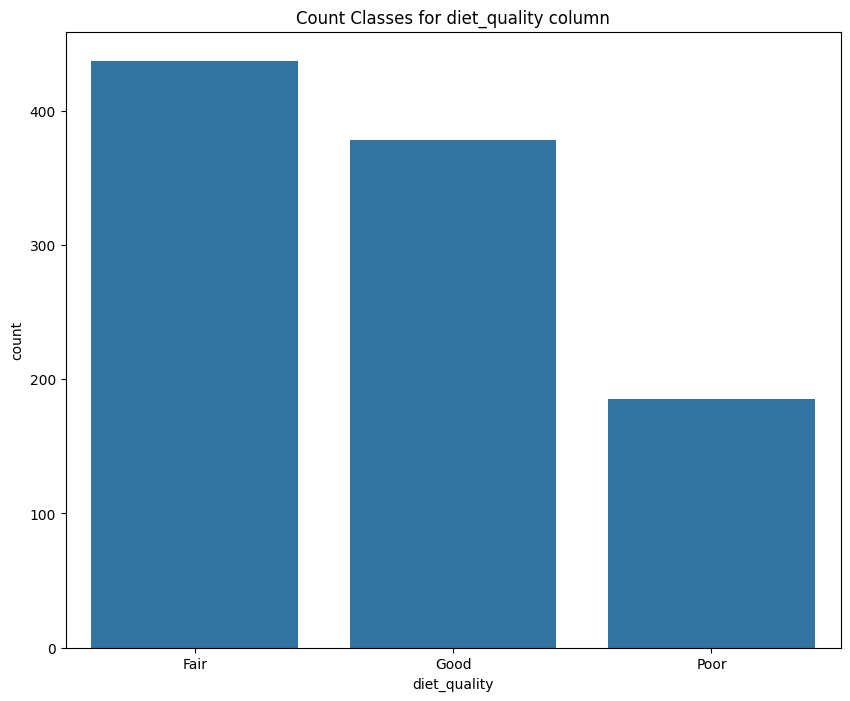

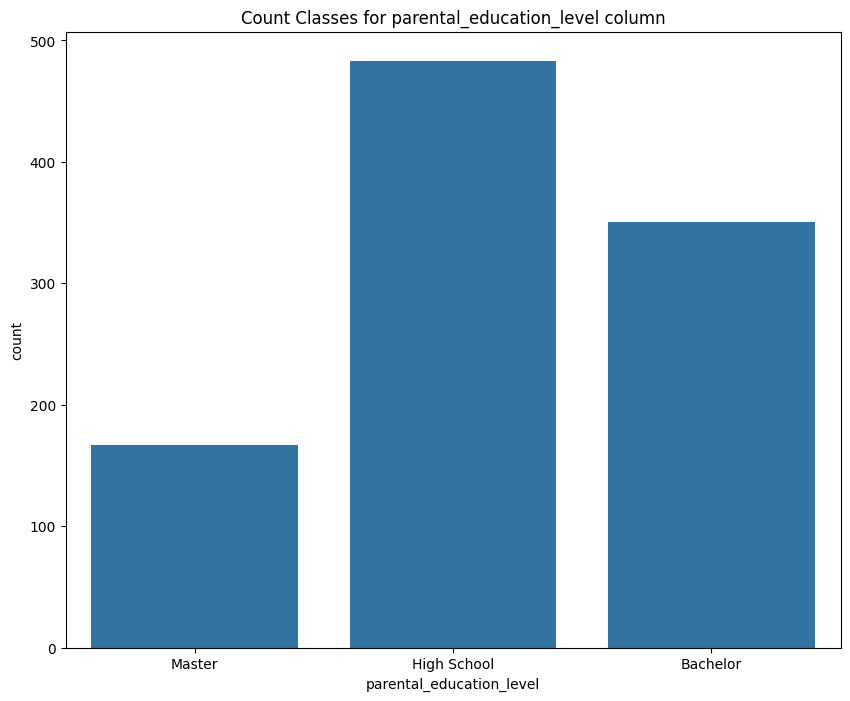

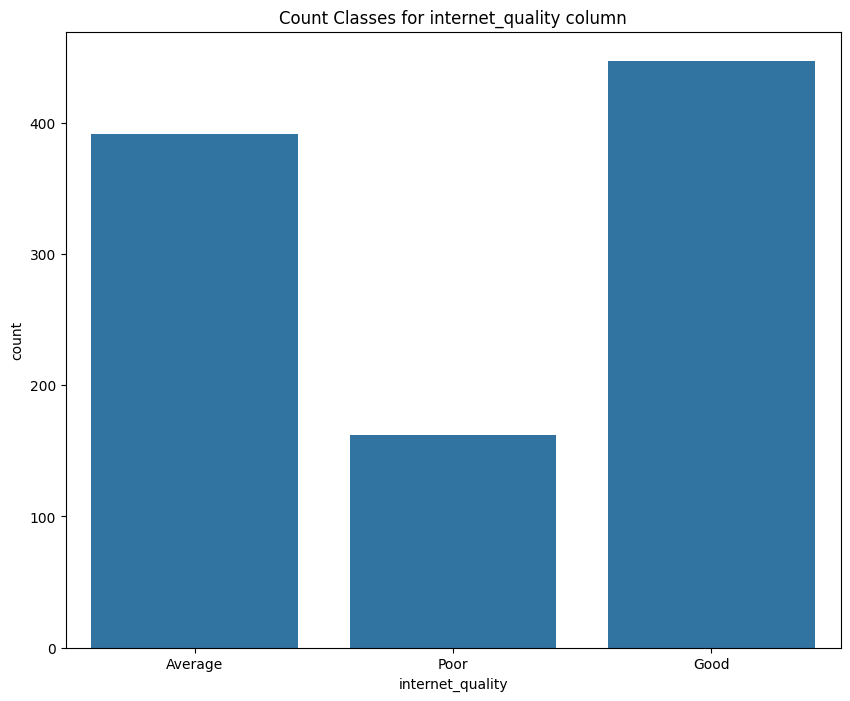

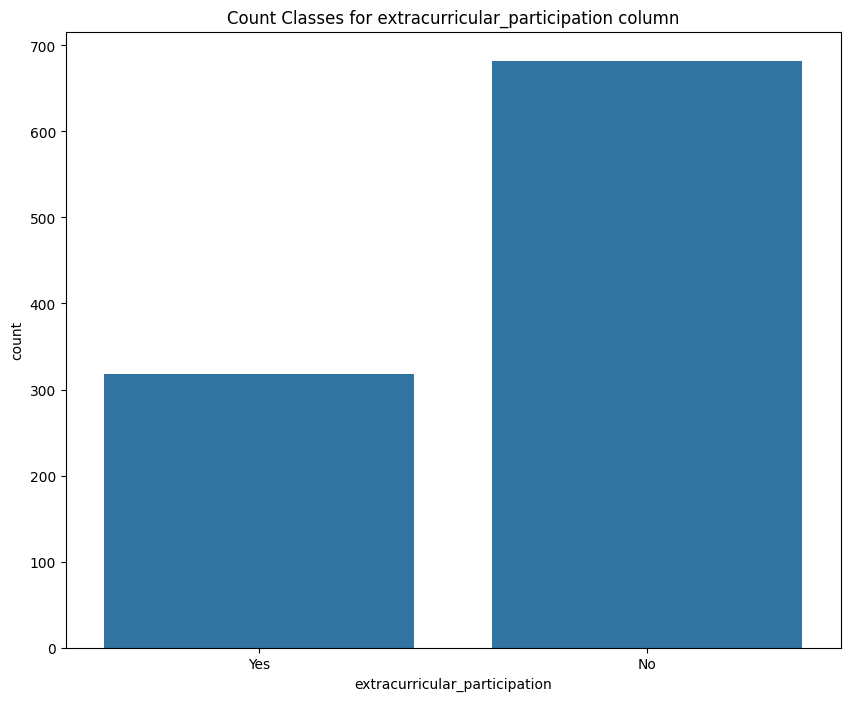

In [249]:

obj_cols=df.select_dtypes(include="object")
for col in obj_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=col)
    plt.title(f"Count Classes for {col} column")
    plt.show()

### Distrubution of object column classes vs Exam score

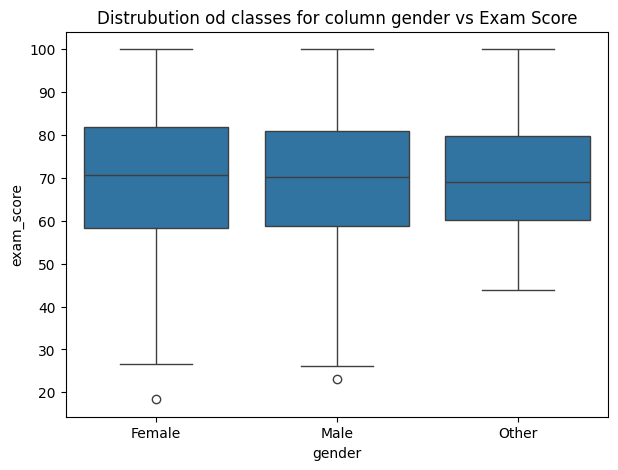

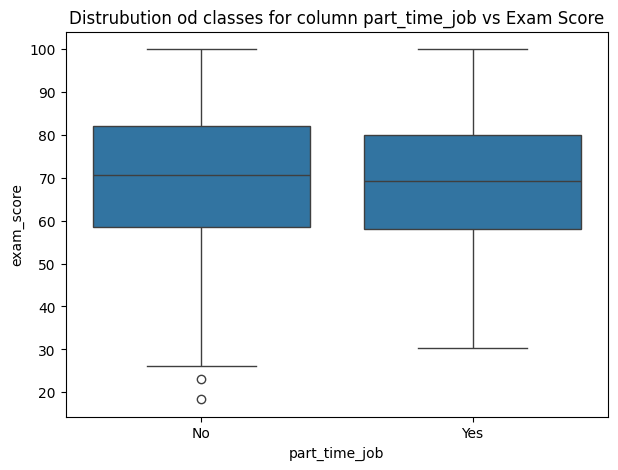

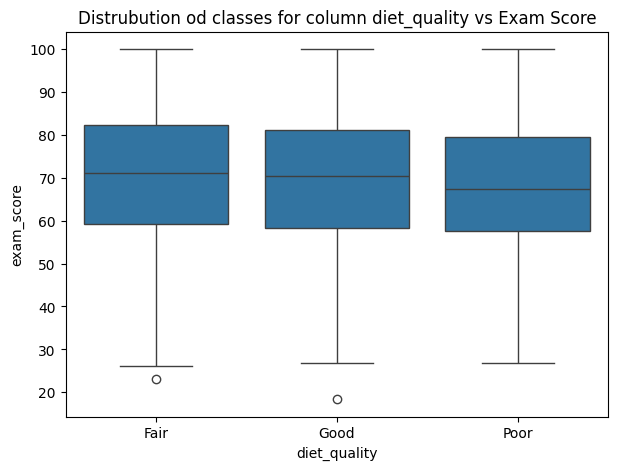

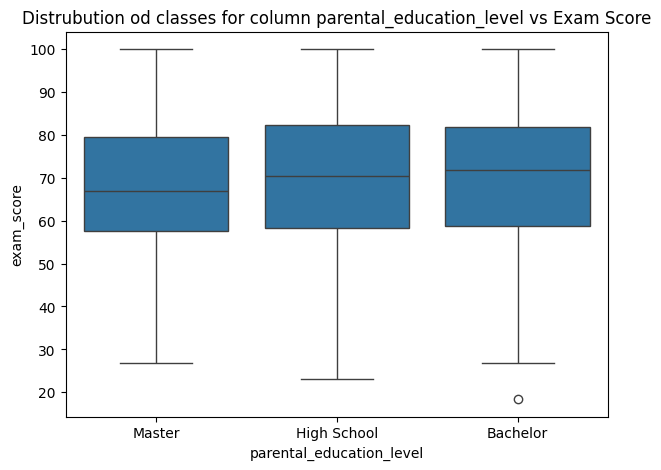

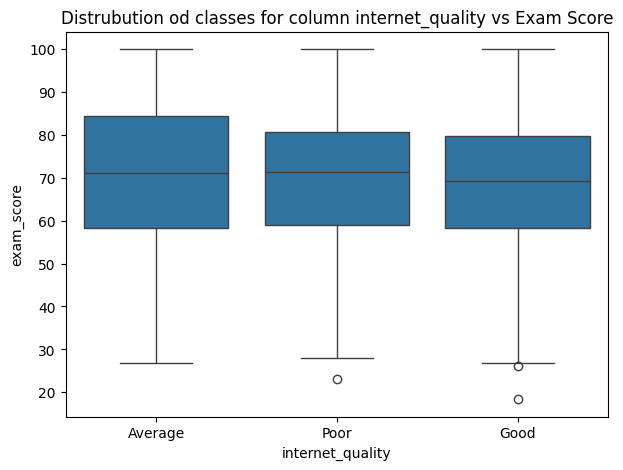

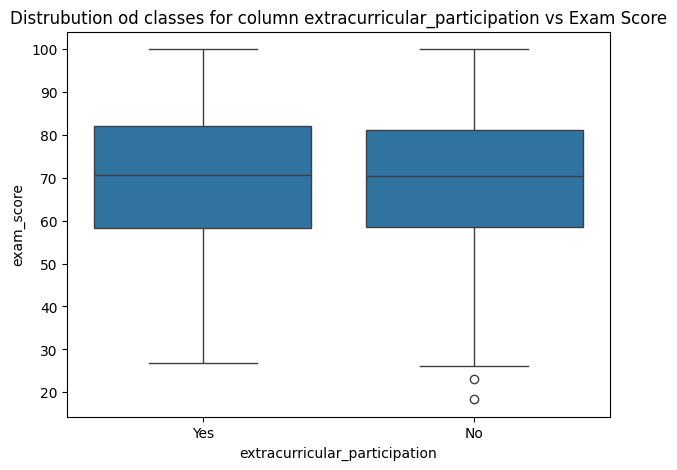

In [250]:
for col in obj_cols:
    plt.figure(figsize=(7,5))
    sns.boxplot(data=df,x=col,y="exam_score")
    plt.title(f"Distrubution od classes for column {col} vs Exam Score")
    plt.show()
    

### Visualization of Numerical column to undersatnd data

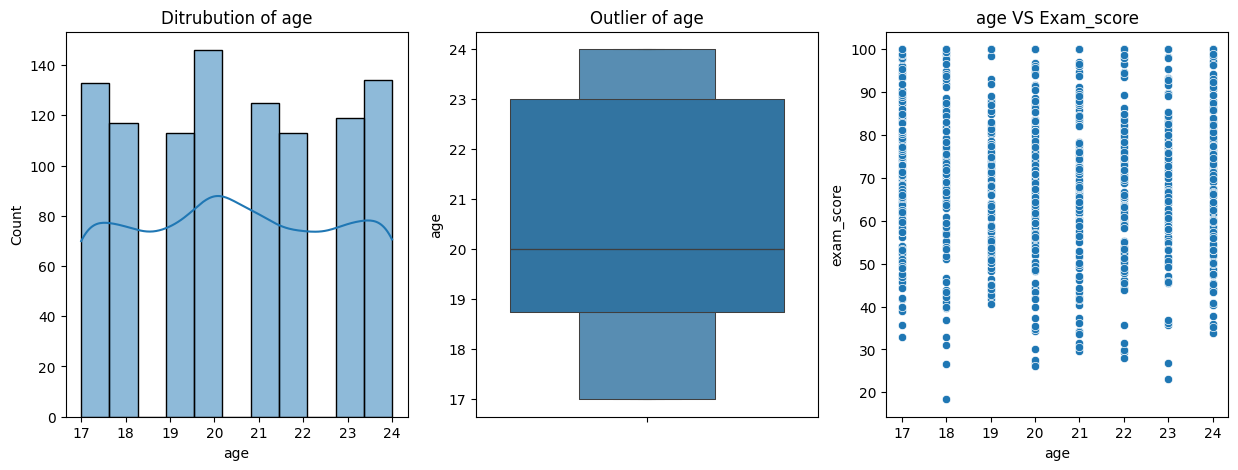

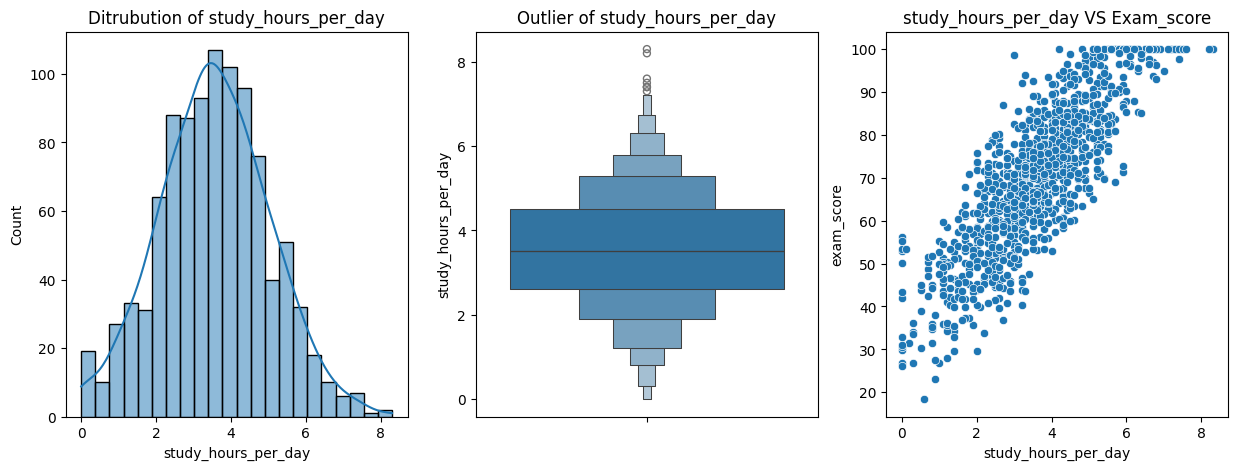

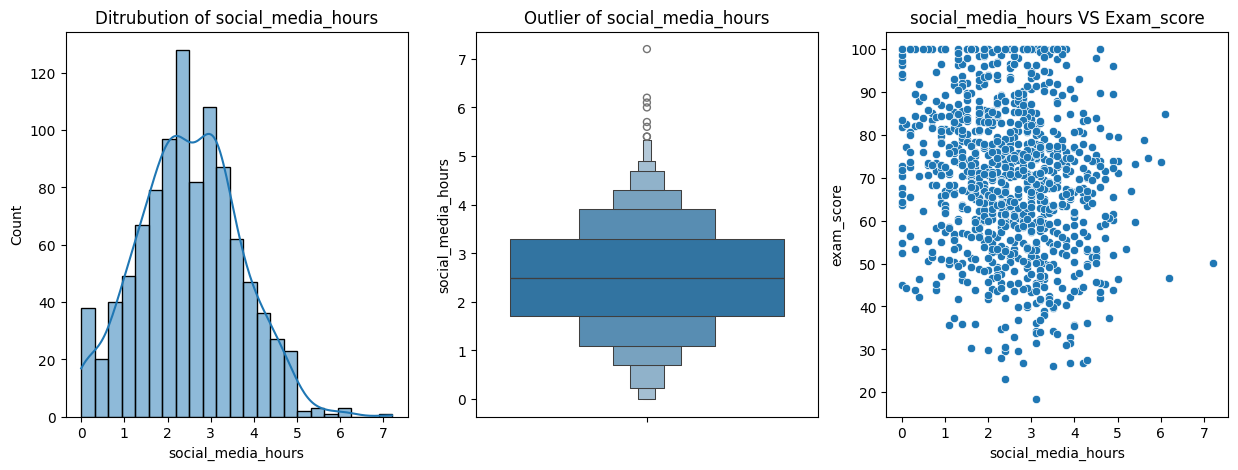

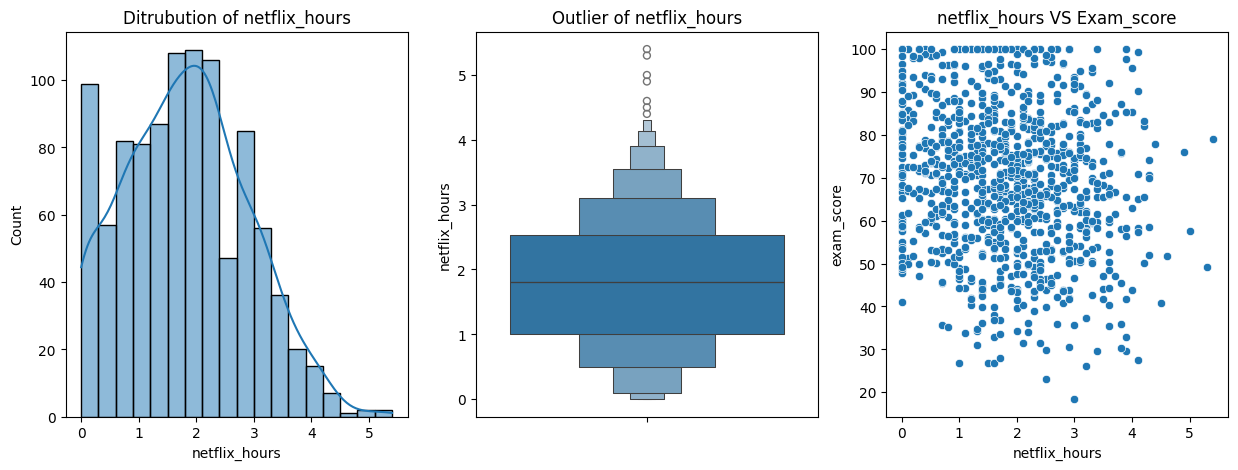

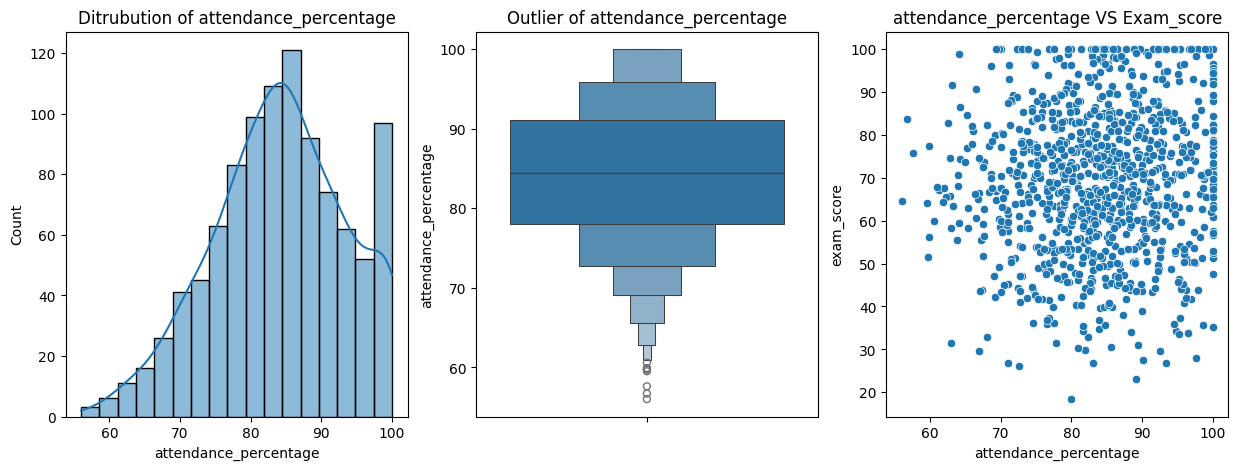

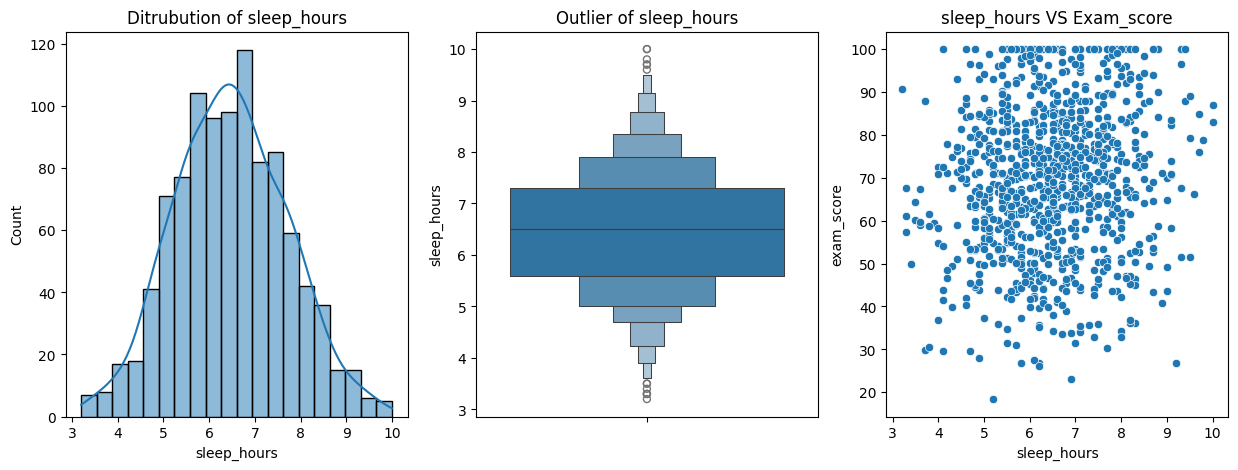

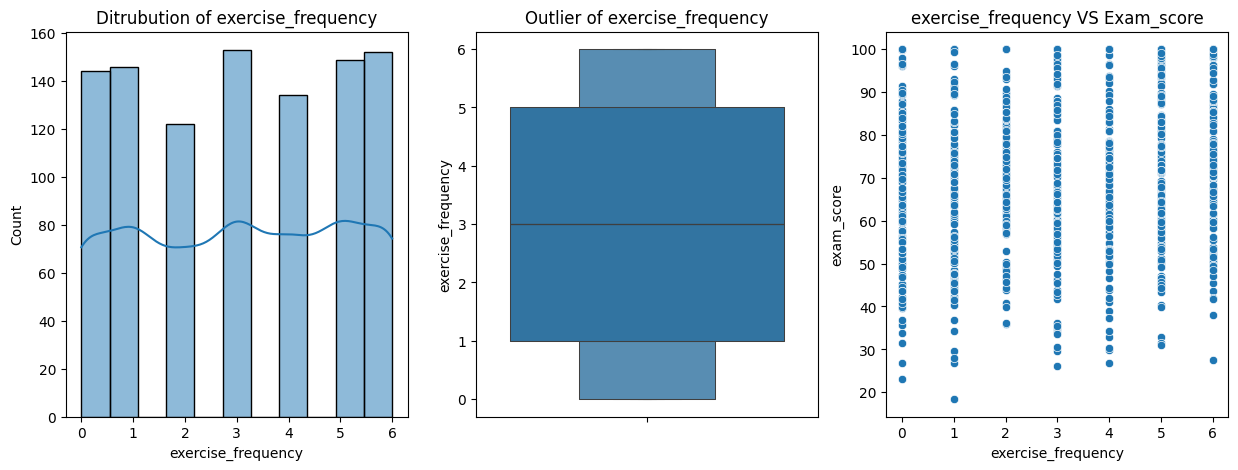

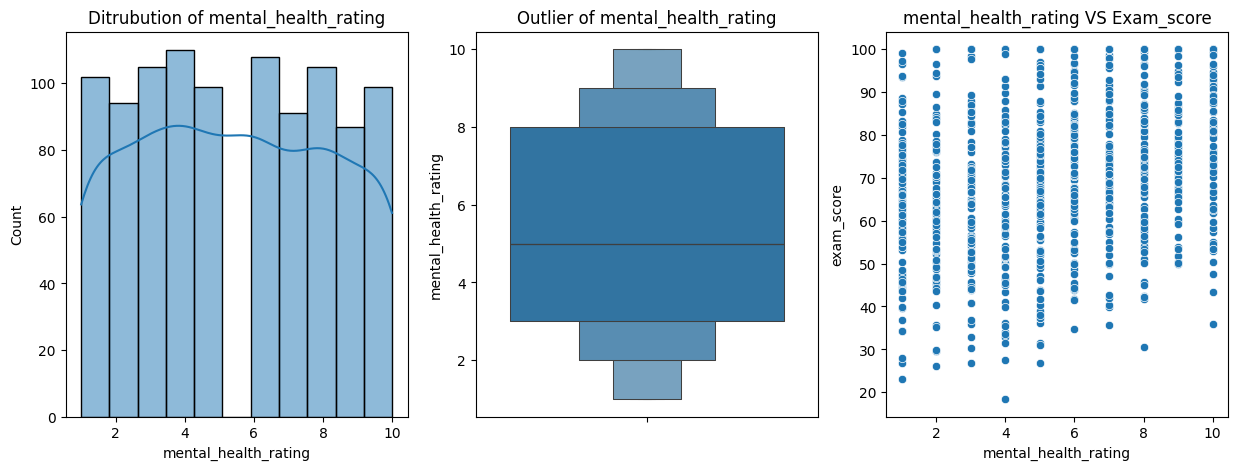

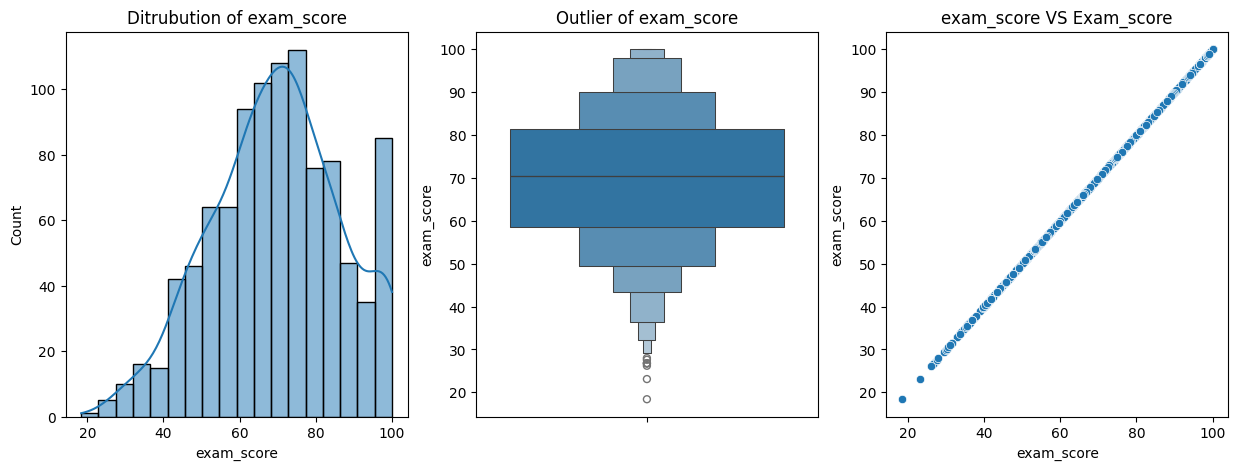

In [251]:
#We will use BoxPlot to detect outlier
#Histplot to see ditrubution of each column
#scatter to know Grouping of value relative to Exam score
num_cols=df.select_dtypes(include="number")
for col in num_cols:
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    sns.histplot(data=df,x=col,kde=True)
    plt.title(f"Ditrubution of {col}")
    plt.subplot(1,3,2)
    sns.boxenplot(data=df,y=col)
    plt.title(f"Outlier of {col}")
    plt.subplot(1,3,3)
    sns.scatterplot(data=df,x=col,y="exam_score")
    plt.title(f"{col} VS Exam_score")
    plt.show()
    

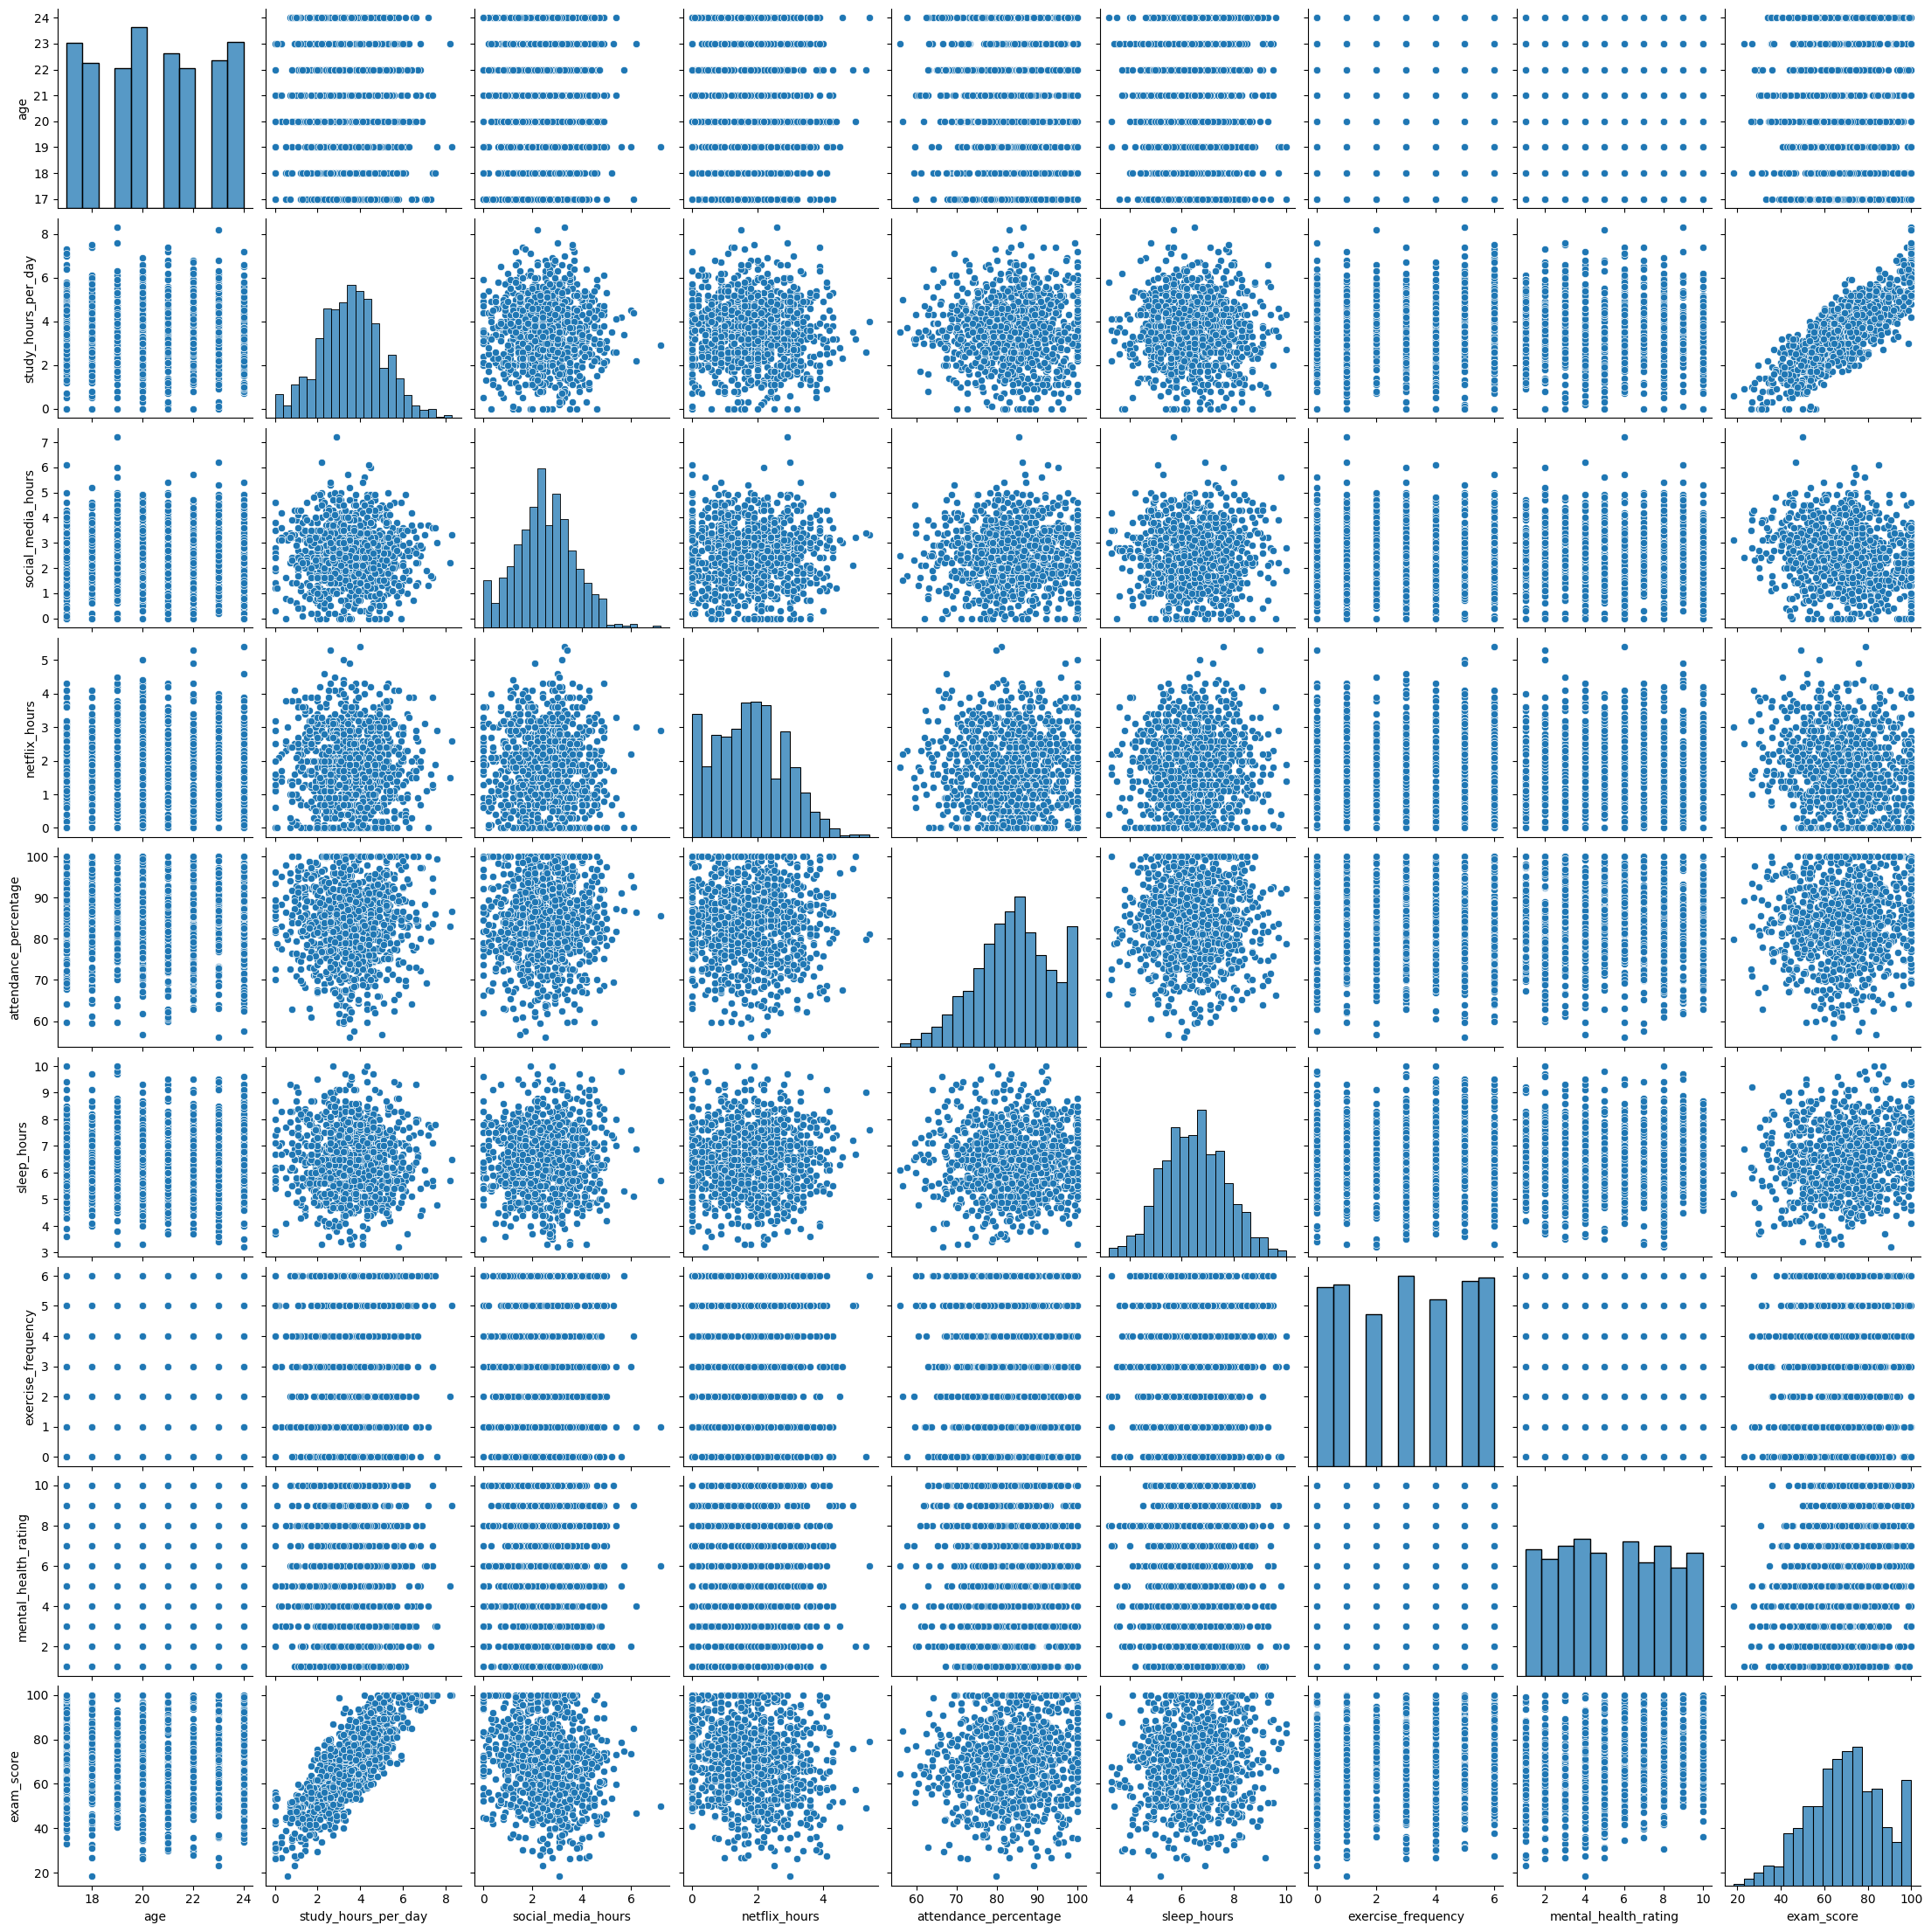

In [252]:
#Visualize for each pair of data columns
sns.pairplot(data=df)

Correlation map between feature

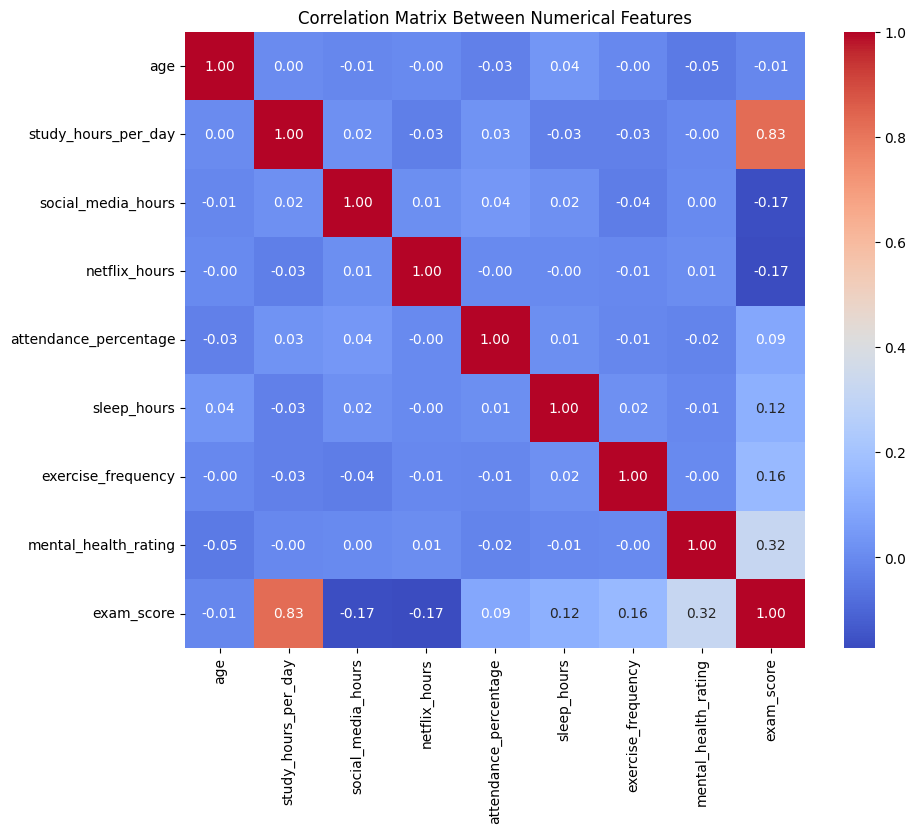

In [253]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
corr = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Between Numerical Features')
plt.show()


In [254]:
#Drop unwanted data
df.drop("age",axis=1,inplace=True)

# Data preprocessing

### Handle irregular values



In [255]:
#Column Gender has a Strange value "other"
df["gender"]=df["gender"].replace("Other","Male")

### Detect outlier

In [256]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
for col in num_cols:
    df[col].sort_values(ascending=True)
    q1 = np.percentile(df[col], 25, method="midpoint")
    q3 = np.percentile(df[col], 75, method="midpoint")
    print(f"Q1 for {col} is {q1}")
    print(f"Q3 for {col} is {q3}")
    iqr=q3-q1
    print(f"IQR for {col} is {iqr}")
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(f"Outlier Lower Bound: {lower_bound}")
    print(f"Outlier Upper Bound: {upper_bound}")
    df= df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    print('/'*50)

Q1 for study_hours_per_day is 2.6
Q3 for study_hours_per_day is 4.5
IQR for study_hours_per_day is 1.9
Outlier Lower Bound: -0.24999999999999956
Outlier Upper Bound: 7.35
//////////////////////////////////////////////////
Q1 for social_media_hours is 1.7
Q3 for social_media_hours is 3.3
IQR for social_media_hours is 1.5999999999999999
Outlier Lower Bound: -0.7
Outlier Upper Bound: 5.699999999999999
//////////////////////////////////////////////////
Q1 for netflix_hours is 1.0
Q3 for netflix_hours is 2.5
IQR for netflix_hours is 1.5
Outlier Lower Bound: -1.25
Outlier Upper Bound: 4.75
//////////////////////////////////////////////////
Q1 for attendance_percentage is 77.9
Q3 for attendance_percentage is 90.9
IQR for attendance_percentage is 13.0
Outlier Lower Bound: 58.400000000000006
Outlier Upper Bound: 110.4
//////////////////////////////////////////////////
Q1 for sleep_hours is 5.6
Q3 for sleep_hours is 7.3
IQR for sleep_hours is 1.7000000000000002
Outlier Lower Bound: 3.04999999999

In [257]:
df.shape

(977, 14)

Feature engineering


In [258]:
df["wasted_time"]=df["social_media_hours"]+df["netflix_hours"]
df.drop(["netflix_hours","social_media_hours"],axis=1,inplace=True)

In [259]:
df.head()

,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,wasted_time
0,Female,0.0,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2,2.3
1,Female,6.9,No,97.3,4.6,Good,6,High School,Average,8,No,100.0,5.1
2,Male,1.4,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3,4.4
3,Female,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8,4.9
4,Female,5.0,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4,4.9


In [260]:
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols

Index(['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'wasted_time'],
      dtype='object')

In [261]:
num_cols=['study_hours_per_day', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating',
       'wasted_time']
scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [262]:
from sklearn.preprocessing import LabelEncoder

encoders = {}
for col in obj_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  
    encoders[col] = le  
    

### Seperate data and split

In [263]:
#Seperate data to feature and target
X=df.drop("exam_score",axis=1,inplace=False)
y=df["exam_score"]

In [264]:
df.head()


,gender,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score,wasted_time
0,0,-2.458280,0,0.093721,1.258546,0,1.462041,2,0,0.897072,1,56.2,-1.267886
1,0,2.352310,0,1.413915,-1.528546,1,1.462041,1,0,0.897072,0,100.0,0.520886
2,1,-1.482218,0,1.145583,1.258546,2,-1.009264,1,2,-1.557940,0,34.3,0.073693
3,0,-1.761093,0,-1.408939,2.242225,2,0.473519,2,1,-1.557940,1,26.8,0.393117
4,0,1.027655,0,0.726985,-1.282626,0,-0.020742,2,1,-1.557940,0,66.4,0.393117


In [265]:
from sklearn.feature_selection import SelectKBest, f_regression
cat_cols = [
    'gender',
    'part_time_job',
    'diet_quality',
    'parental_education_level',
    'internet_quality',
    'extracurricular_participation'
]
X_encoded = df[cat_cols]
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_encoded, y)  # y = exam_score
feature_scores = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)

print(feature_scores)


                         Feature     Score
2                   diet_quality  3.082958
3       parental_education_level  2.233009
1                  part_time_job  1.127516
4               internet_quality  0.436427
5  extracurricular_participation  0.144173
0                         gender  0.013038


In [266]:
#Drop columns that is low affect
df.drop(["gender","extracurricular_participation"],axis=1,inplace=True)

In [267]:
X=df.drop("exam_score",axis=1,inplace=False)
y=df["exam_score"]

In [268]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=44,shuffle=True)
print(f"the shape of X train is {x_train.shape}")
print(f"the shape of X test is {x_test.shape}")
print(f"the shape of Y train is {y_train.shape}")
print(f"the shape of Y test is {y_test.shape}")

the shape of X train is (781, 10)
the shape of X test is (196, 10)
the shape of Y train is (781,)
the shape of Y test is (196,)


# Build the models with Grid search and evaluate

In [269]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [270]:
regressors = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor()
}


In [271]:
param_grids = {
    "Linear Regression": {},  
    "SVR": {
        'kernel': ['rbf', 'linear'],
        'C': [0.1, 1, 10]
    },
    "Decision Tree": {
        'max_depth': [5, 10, 15],
        'min_samples_split': [5, 10, 20]
    },
    "Random Forest": {
        'n_estimators': [50,100, 150],
        'max_depth': [5, 10,15],
        'min_samples_split': [2, 10,15]
    },
    "AdaBoost": {
        'n_estimators': [50,100, 150],
        'learning_rate': [.01,0.1, 1]
    },
    "Gradient Boosting": {
        'n_estimators': [50,100, 150],
        'learning_rate': [.01,0.1, 1],
        'max_depth': [3, 10,15]
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7]
    },
    "XGBoost": {
        'learning_rate': [.01,0.1, 1],
        'n_estimators': [50,100, 150],
        'max_depth': [3, 10,15]
    }
}

In [272]:
best_models = {}
r2_scores = {}
mae_scores = {}
rmse_scores = {}
for name in regressors:
    print(f"\n Grid Search for: {name}")
    grid = GridSearchCV(estimator=regressors[name],
                        param_grid=param_grids[name],
                        scoring='r2',
                        cv=5,
                        n_jobs=-1)
    grid.fit(x_train, y_train)
    best_models[name] = grid.best_estimator_

    y_pred = grid.predict(x_test)

    # حساب مقاييس الأداء
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # تخزين النتائج
    r2_scores[name] = r2
    mae_scores[name] = mae
    rmse_scores[name] = rmse

    print(f"R² Score: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}")



 Grid Search for: Linear Regression
R² Score: 0.8943, MAE: 4.4085, RMSE: 5.4082

 Grid Search for: SVR
R² Score: 0.8894, MAE: 4.4850, RMSE: 5.5317

 Grid Search for: Decision Tree
R² Score: 0.7221, MAE: 7.0351, RMSE: 8.7678

 Grid Search for: Random Forest
R² Score: 0.8596, MAE: 5.0875, RMSE: 6.2318

 Grid Search for: AdaBoost
R² Score: 0.8270, MAE: 5.7319, RMSE: 6.9185

 Grid Search for: Gradient Boosting
R² Score: 0.8753, MAE: 4.7788, RMSE: 5.8726

 Grid Search for: K-Nearest Neighbors
R² Score: 0.7819, MAE: 6.1394, RMSE: 7.7684

 Grid Search for: XGBoost
R² Score: 0.8676, MAE: 4.8925, RMSE: 6.0532


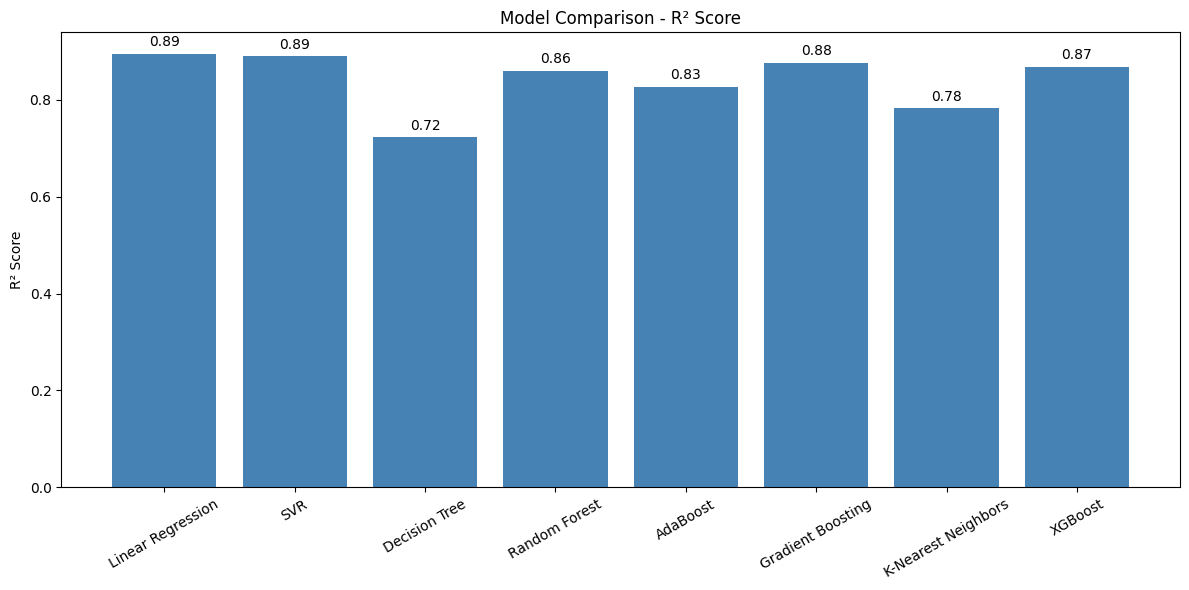

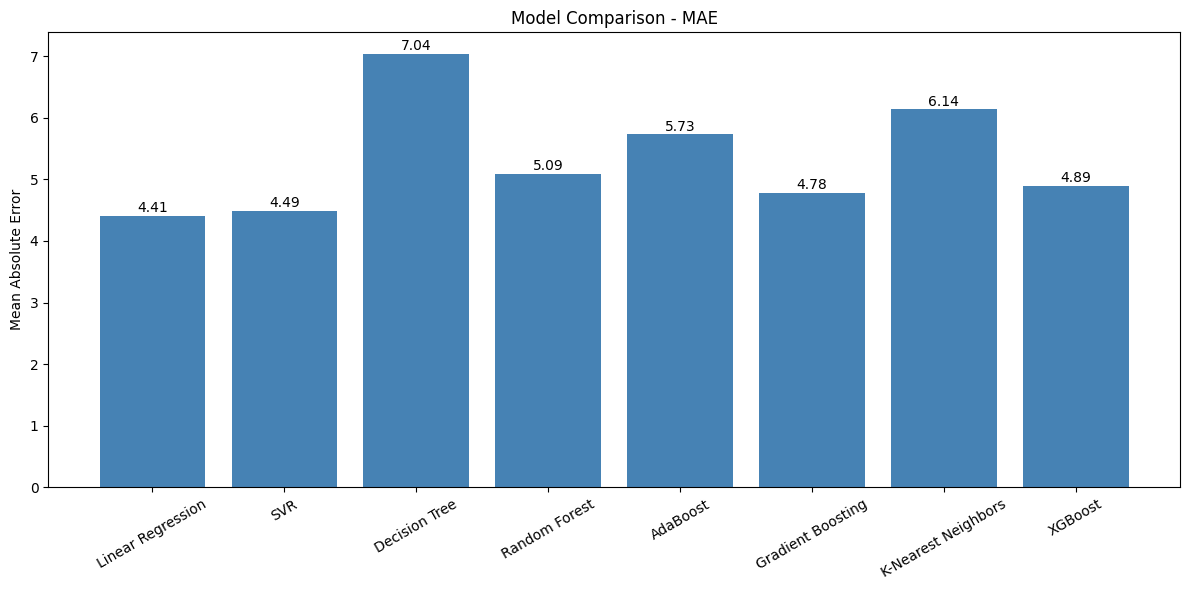

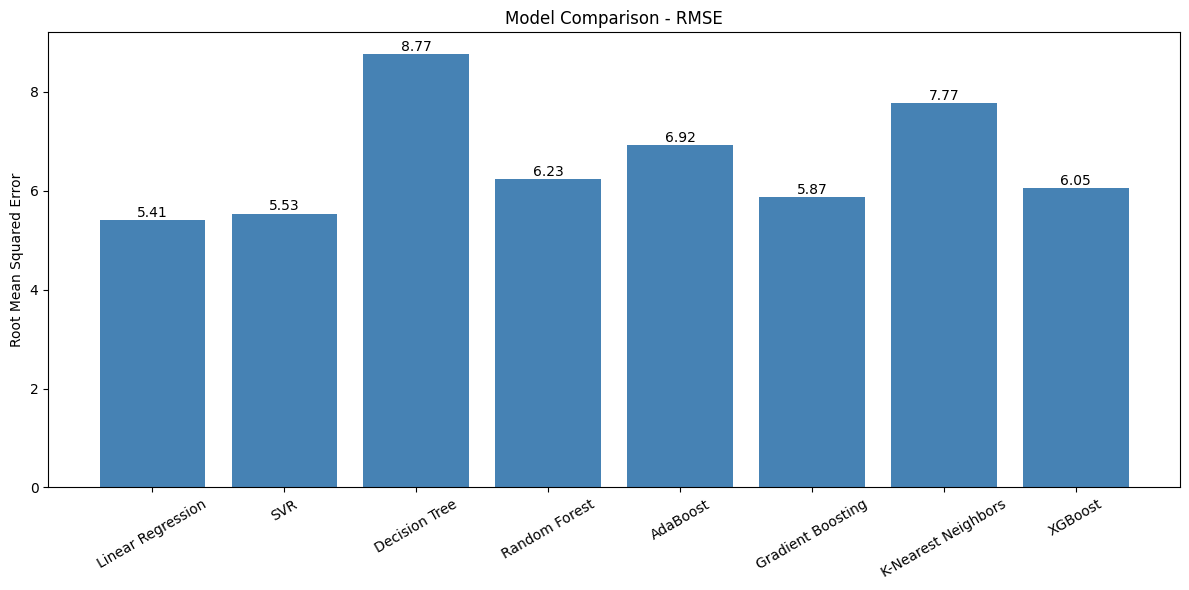

In [273]:
def plot_scores(score_dict, title, ylabel):
    models = list(score_dict.keys())
    scores = list(score_dict.values())

    plt.figure(figsize=(12, 6))
    bars = plt.bar(models, scores, color='steelblue')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=30)

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


plot_scores(r2_scores, "Model Comparison - R² Score", "R² Score")

plot_scores(mae_scores, "Model Comparison - MAE", "Mean Absolute Error")

plot_scores(rmse_scores, "Model Comparison - RMSE", "Root Mean Squared Error")


In [274]:
results_df = pd.DataFrame({
    'Model': list(r2_scores.keys()),
    'R² Score': list(r2_scores.values()),
    'MAE': list(mae_scores.values()),
    'RMSE': list(rmse_scores.values())
})
results_df.sort_values(by='R² Score', ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)
results_df.index += 1  # يبدأ من 1 بدل 0
results_df.index.name = 'Rank'
print(results_df)


                    Model  R² Score       MAE      RMSE
Rank                                                   
1       Linear Regression  0.894276  4.408465  5.408179
2                     SVR  0.889390  4.485005  5.531737
3       Gradient Boosting  0.875337  4.778842  5.872633
4                 XGBoost  0.867552  4.892512  6.053241
5           Random Forest  0.859621  5.087483  6.231839
6                AdaBoost  0.826979  5.731898  6.918530
7     K-Nearest Neighbors  0.781861  6.139359  7.768399
8           Decision Tree  0.722124  7.035112  8.767791


In [275]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [276]:
import pickle
with open("best_model.pkl", "wb") as f:
    pickle.dump(model, f)
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [277]:
x_train.head()

,study_hours_per_day,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,wasted_time
37,0.539624,1,-2.149535,-2.102359,1,-1.503525,1,0,-1.207224,-1.140117
892,-0.715312,0,0.265454,-0.135000,0,-1.503525,1,1,-1.207224,0.137578
236,-1.412499,0,-0.346343,-0.380920,1,-0.020742,1,1,-0.155076,-0.309615
736,-0.297000,0,-0.593209,0.356840,0,-1.503525,0,0,0.195640,-0.629039
270,0.330468,1,1.338782,-0.380920,1,0.473519,1,1,-0.856508,0.776425
